# Name: Abdul Samad 

# Course :Machine learning For Data Science 

# Assigmnet :Breast Cancer Prediction using Machine Learning **cancer is benign or malignant**

# Email:abdulsamads3414@gmail.com

# Course Instructor:Sir Sajid Majeed 

In [436]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [437]:
df=pd.read_csv(r"D:\Ned Machine Learning Course\Assignments\Assignment KNN Algorithm\Breast Cancer data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [438]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [439]:
df.drop(columns=['Unnamed: 32'],inplace=True)

In [440]:
df.shape

(569, 32)

In [441]:
df.duplicated().sum()

np.int64(0)

In [442]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [443]:
# Find columns with high variance that could introduce bias
high_variance_cols = x.var().sort_values(ascending=False)
# Display top 5 columns with highest variance
print("Columns with highest variance (potential bias):")
print(high_variance_cols.head(5))

Columns with highest variance (potential bias):
texture_worst    37.776483
radius_worst     23.360224
texture_mean     18.498909
radius_mean      12.418920
perimeter_se      4.087896
dtype: float64


In [444]:
# Apply standard scaling on individual columns with highest variance
from sklearn.preprocessing import StandardScaler
# apply on inditual columns
scaler = StandardScaler()
cols_to_scale = ["area_worst", "area_mean", "area_se", "perimeter_worst", "perimeter_mean"]
df[cols_to_scale]= scaler.fit_transform(df[cols_to_scale])

In [445]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,5.690000e+02,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,-1.248757e-16,-2.185325e-16,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,-3.746271e-16,0.000000,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,1.000880e+00,1.000880e+00,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,1.000880e+00,1.000880,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,-1.984504e+00,-1.454443e+00,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,-1.693361e+00,-1.222423,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,-6.919555e-01,-6.671955e-01,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,-6.895783e-01,-0.642136,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,-2.359800e-01,-2.951869e-01,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,-2.859802e-01,-0.341181,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,4.996769e-01,3.635073e-01,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,5.402790e-01,0.357589,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,3.976130e+00,5.250529e+00,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,4.287337e+00,5.930172,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [446]:
# drop id column
df.drop(columns=["id"],inplace=True)

In [447]:
df.shape

(569, 31)

In [448]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [449]:
# Replace B with Benign and M with Maligant
df["diagnosis"].replace({"B":"benigen","M":"maligant"},inplace=True)
df.head(2)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,maligant,17.99,10.38,1.269934,0.984375,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,2.303601,2.001237,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,maligant,20.57,17.77,1.685955,1.908708,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,1.535126,1.890489,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [450]:
df["diagnosis"].value_counts()

diagnosis
benigen     357
maligant    212
Name: count, dtype: int64

In [451]:
x=df.drop(columns=["diagnosis"],axis=1)
y=df["diagnosis"]

In [452]:
x.shape

(569, 30)

In [453]:
y.shape

(569,)

In [454]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [455]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [456]:
from sklearn.preprocessing import StandardScaler
stcal=StandardScaler()
x_train=stcal.fit_transform(x_train)
x_test=stcal.transform(x_test)

In [457]:
df.describe()   

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,5.690000e+02,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,-1.248757e-16,-2.185325e-16,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,-3.746271e-16,0.000000,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,1.000880e+00,1.000880e+00,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,1.000880e+00,1.000880,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,-1.984504e+00,-1.454443e+00,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,-1.693361e+00,-1.222423,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,-6.919555e-01,-6.671955e-01,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,-6.895783e-01,-0.642136,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,-2.359800e-01,-2.951869e-01,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,-2.859802e-01,-0.341181,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,4.996769e-01,3.635073e-01,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,5.402790e-01,0.357589,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,3.976130e+00,5.250529e+00,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,4.287337e+00,5.930172,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [458]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [459]:
# dataframe
df = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred})
df

,y_test,y_pred
204,benigen,benigen
70,maligant,maligant
131,maligant,maligant
431,benigen,benigen
540,benigen,benigen
...,...,...
486,benigen,benigen
75,maligant,maligant
249,benigen,benigen
238,benigen,benigen


In [460]:
Wrong_Prediction=df[df["y_test"]!=df["y_pred"]]
Wrong_Prediction.shape

(6, 2)

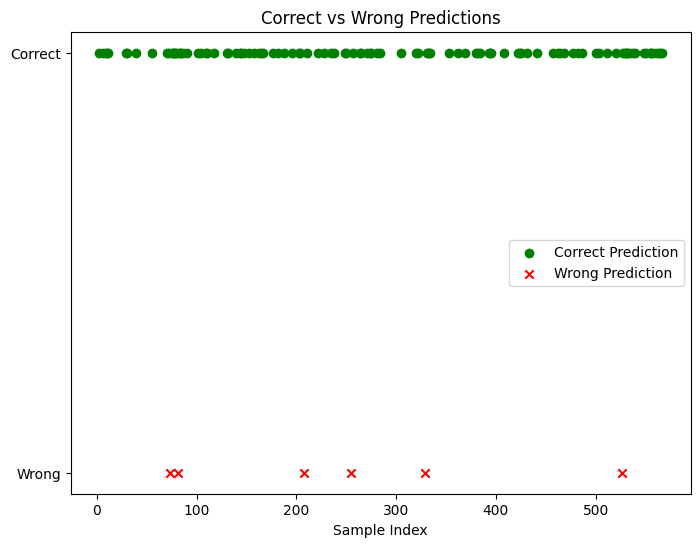

In [461]:
# Plot correct and wrong predictions
correct = df[df["y_test"] == df["y_pred"]]
wrong = df[df["y_test"] != df["y_pred"]]

plt.figure(figsize=(8, 6))
plt.scatter(correct.index, [1]*len(correct), color='green', label='Correct Prediction', marker='o')
plt.scatter(wrong.index, [0]*len(wrong), color='red', label='Wrong Prediction', marker='x')
plt.yticks([0, 1], ['Wrong', 'Correct'])
plt.xlabel('Sample Index')
plt.title('Correct vs Wrong Predictions')
plt.legend()
plt.show()

In [462]:
# accuracy_score, confusion_matrix and classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9473684210526315
[[68  3]
 [ 3 40]]
              precision    recall  f1-score   support

     benigen       0.96      0.96      0.96        71
    maligant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

